#### YNOV - Master 2 DATAEN

# Maths DataScience
### Probabilités et statistiques, Algèbre linéaire avec Python

# 1. Vecteurs et matrices

Un élément unique, un vecteur ligne ou colonne sont des cas particuliers de matrice (tableau 2D).

Une des bibliothèques de <code>Python</code> les plus utilisées en algèbre linéaire est la bibliothèque <code>numpy</code>. On commence par l'importer pour pouvoir l'utiliser pour la suite.

In [1]:
import numpy as np

### Exercice 1.

Création de tableaux, accès à un élément d'un tableau 

**Note :** Je ne vois pas de question spécifique ni de code à produire dans l'exercice 1. Peut-être je me trompe, d'où cette note.

Création d'un vecteur ligne :

In [2]:
L1 = np.array([10, 20, 30, 40])
L1

array([10, 20, 30, 40])

Création d'un vecteur colonne :

In [3]:
C1 = np.array([[10], [20], [30], [40]])
C1

array([[10],
       [20],
       [30],
       [40]])

<b>Question : </b> Comment obtenir <code>C1</code> à partir de <code>L1</code> ?

**En redimentionnant avec reshape.**

In [4]:
C2 = L1.reshape((4, 1))
C2


array([[10],
       [20],
       [30],
       [40]])

Accès à un élément d'un tableau. Les indices commencent à <code>0</code>.

In [5]:
L1[2]

30

In [6]:
C1[2]

array([30])

In [7]:
C1[2][0]

30

Création d'une matrice :

In [8]:
M1 = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
M1

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

La matrice est <code>3 x 3</code> :

In [9]:
M1.shape

(3, 3)

Taille d'une matrice, d'un vecteur, d'un tableau :

In [10]:
np.size(L1)

4

In [11]:
np.size(C1)

4

In [12]:
np.size(M1)

9

In [13]:
np.size(M1[1])

3

 Accéder aux éléments d'un tableau 2D (indiceLigne, indiceColonne) :

In [14]:
iL = 1
iC = 2
M1[iL, iC]

60

Extraire une ligne, une colonne :

In [15]:
print(M1[1, :])
print(M1[:, 2])

[40 50 60]
[30 60 90]


Extraire une sous-matrice :

In [16]:
M1[1:2, 0:1]

array([[40]])

Fonctions prédéfinies de création de tableaux :

In [17]:
M2 = np.zeros(3) 
M2

array([0., 0., 0.])

In [18]:
M3 = np.zeros((1,3))
M3

array([[0., 0., 0.]])

In [19]:
M4 = np.zeros((2, 3))
M4

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
M5 = np.ones((2,4))
M5

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [21]:
Id = np.eye(3) 
Id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Créer un tableau à partir de ses lignes :

In [22]:
L1 = np.array([5, 1, 3])
L2 = np.array([10, 4, 2])
L3 = np.array([3, 5, 0])
M6 = np.concatenate(([L1], [L2], [L3]))
M6

array([[ 5,  1,  3],
       [10,  4,  2],
       [ 3,  5,  0]])

Redimensionner une matrice :

    - le nombre d'élements est le même avant et après
    - le parcours ligne par ligne donne la même suite d'éléments

In [23]:
L1 = np.array([5, 1, 3])
L2 = np.array([10, 4, 2])
M7 = np.concatenate(([L1], [L2]))
M7

array([[ 5,  1,  3],
       [10,  4,  2]])

In [24]:
M8 = np.reshape(M7, (3, 2))
M8

array([[ 5,  1],
       [ 3, 10],
       [ 4,  2]])

##### Opérations sur les matrices 

Produit scalaire de deux vecteurs :

In [25]:
L1 = np.array([1, 2, 3])
L2 = np.array([1, 2, 3])
prod = np.dot(L1, L2)
prod

14

Soit <code>M</code> la matrice définie comme suit :

In [26]:
L = np.linspace(0, 10, 9)
M = np.array([L, L, L])
M

array([[ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ]])

Somme de deux matrices :

In [27]:
M + M

array([[ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ],
       [ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ],
       [ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]])

Produit élément par élément de deux matrices :

In [28]:
M * M

array([[  0.    ,   1.5625,   6.25  ,  14.0625,  25.    ,  39.0625,
         56.25  ,  76.5625, 100.    ],
       [  0.    ,   1.5625,   6.25  ,  14.0625,  25.    ,  39.0625,
         56.25  ,  76.5625, 100.    ],
       [  0.    ,   1.5625,   6.25  ,  14.0625,  25.    ,  39.0625,
         56.25  ,  76.5625, 100.    ]])

Produit de deux matrices (compatibles) :

In [29]:
np.matmul(M, M) #erreur : pourquoi ?
# Transposition

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 9)

In [30]:
np.matmul(M, M.T)

array([[318.75, 318.75, 318.75],
       [318.75, 318.75, 318.75],
       [318.75, 318.75, 318.75]])

A présent, nous allons illustrer la puissance de le bibliothèque <code>numpy</code>. Pour cela nous allons d'abord définir notre propre fonction <code>prod_matrices</code> calculant le produit en utilisant des boucles imbriquées : 

In [31]:
def prod_matrices(M1, M2):
    M = np.zeros((M1.shape[0], M2.shape[1]))
    for i in range(M1.shape[0]):
        for j in range(M2.shape[1]):
            for k in range(M1.shape[1]):
                M[i, j] += M1[i, k] * M2[k,j] 
    return M

Test de la fonction :

In [32]:
M1 = np.array([[2, 1, 1], [4, 5, 7]])
M2 = np.array([[3, 2], [2, 1], [5, 4]])
prod_matrices(M1, M2)

array([[13.,  9.],
       [57., 41.]])

Avec un peu plus d'éléments :

In [33]:
L = np.linspace(0, 1000, 1000)
M = np.array([L, L, L])

In [34]:
P = prod_matrices(M, M.T)
P

array([[3.33500167e+08, 3.33500167e+08, 3.33500167e+08],
       [3.33500167e+08, 3.33500167e+08, 3.33500167e+08],
       [3.33500167e+08, 3.33500167e+08, 3.33500167e+08]])

La fonction <code>time</code> permet d'afficher des statistiques sur le temps d'exécution d'une instruction <code>Python</code>. Exécutez les instructions suivantes et observez les résultats :

In [35]:
%time P = prod_matrices(M, M.T) 

CPU times: total: 0 ns
Wall time: 3.98 ms


In [36]:
%time P= np.matmul(M, M.T)

CPU times: total: 0 ns
Wall time: 0 ns


La différence est encore plus flagrante si on utilise des matrices creuses : 

In [37]:
L1 = np.linspace(0, 1000, 1000)
L2 = np.zeros(1000)
M = np.array([L2, L2, L1])

In [38]:
%time P = prod_matrices(M, M.T) 

CPU times: total: 0 ns
Wall time: 5 ms


In [39]:
%time P= np.matmul(M, M.T)

CPU times: total: 0 ns
Wall time: 0 ns


### Exercice 2.

Chercher des éléments dans un tableau

1. A tester : 

**C'est testé.**

In [40]:
from random import sample, choices

In [41]:
V1 = np.reshape(choices(range(1, 25), k=200), (200, ))
V1

array([ 4,  2,  8, 10, 16,  1, 11,  7, 15, 13, 14, 22,  1, 17, 10, 10,  8,
        5,  4,  9,  1, 24, 17, 15,  9, 21, 21, 14,  3, 14,  7, 14, 19, 19,
        9, 10, 18, 17, 11, 22, 16, 20, 12, 20, 18,  2, 12,  4, 21, 23, 15,
       10, 10, 21, 11, 13,  7, 10, 21, 20, 23, 12, 18, 11,  8,  2, 21, 23,
       14, 17,  4,  8, 21, 10,  9, 12, 23, 18, 14,  6,  2, 14, 22, 15, 23,
       24,  5,  9,  1, 14,  8,  9, 10,  2, 13,  2,  8,  7, 12, 21, 15,  6,
        3, 12,  4,  9,  2,  4, 20, 17,  5, 15, 11,  8,  8, 22,  3, 10,  9,
        7, 22, 11, 18,  3,  6, 21,  2,  3,  9, 19,  9, 19,  4, 22, 19, 13,
        4,  3, 14, 20, 20, 12, 11,  3,  2, 17, 23, 20, 23,  1, 18,  8,  1,
        2,  4,  4, 22,  1, 12,  6,  3,  9,  3, 14, 21, 10, 20, 15, 22, 12,
       18, 14, 16, 12, 19, 12,  5,  6,  8,  2,  7, 14,  5, 23, 10,  1, 14,
        5, 23, 22, 20,  5,  3, 21, 24, 16, 15,  8,  3, 20])

In [42]:
V2 = V1[V1>20]
V2

array([22, 24, 21, 21, 22, 21, 23, 21, 21, 23, 21, 23, 21, 23, 22, 23, 24,
       21, 22, 22, 21, 22, 23, 23, 22, 21, 22, 23, 23, 22, 21, 24])

2. Créer deux vecteurs ligne d’entiers <code>Va</code> et <code>Vb</code>, de même taille, contenant des valeurs entières aléatoires.

**Réponse :** Création d'une fonction pour permettre la réutilisation et l'optimisation du code.

In [45]:
def creer_vecteur_aléatoire(taille, min_val=0, max_val=100):
    return np.random.randint(min_val, max_val, taille)
Va = creer_vecteur_aléatoire(5)
Vb = creer_vecteur_aléatoire(5)

Va

array([69, 36, 17, 61, 79])

In [46]:
Vb 


array([63, 92,  7, 86, 18])

3. Tester le code suivant. Que contient <code>V</code>?

**Réponse :** V contient les plus hautes valeurs pour chaque cellule.

In [47]:
V = np.array([Va[i] if Va[i] > Vb[i] else Vb[i] for i in range(Va.shape[0])])
V

array([69, 92, 17, 86, 79])

4. Quelle est la fonction de <code>numpy</code> qui permet d'obtenir le même résultat? Tester.

**Réponse :** La fonction "maximum".

In [48]:
V = np.maximum(Va, Vb)
V

array([69, 92, 17, 86, 79])

# 2. Probabilités et statistiques, lois usuelles

Dans cette section, nous allons passer en revue quelques éléments de probabilités et statistiques. Nous allons essentiellement faire de l'inférence statistique et manipuler la loi normale.

#### Loi des grands nombres

On lance une pièce biaiséé. On obtient pile avec probabilité $p\in[0, 1]$ et face avec probabilité $q = 1 - p$.

Ecrire une fonction <code>lancer(n, p)</code> qui simule le lancer de ce dé <code>n</code> fois avec la probabilité <code>p</code> d'obtenir pile et qui retourne le nombre de fois où pile est obtenu.

<em>Indication :</em> <code>uniform(0,1)</code> de la bibliothèque <code>random</code> retourne un nombre réel aléatoire tiré uniformément dans l'intervalle $[0, 1]$. 

In [50]:
from numpy.random import uniform
def lancer(n, p):
    # Générer n valeurs aléatoires entre 0 et 1
    resultats = uniform(0, 1, n)
    # Compter combien de fois le résultat est inférieur à p (pile)
    nombre_piles = sum(resultats < p)
    return nombre_piles

Essayer avec différentes valeurs $p$ et des valeurs de $n$ croissantes. Qu'observez-vous ?

**Réponse :** Nous remarquons que, mis à part des légères variations, plus nous augmenton sla valeur de n, plus nous nous approchons de p.

In [51]:
nombre_piles = lancer(1000, 0.5)
nombre_piles

505

In [52]:
nombre_piles = lancer(10000, 0.5)
nombre_piles

5002

In [53]:
nombre_piles = lancer(1000, 0.9)
nombre_piles

885

#### Loi normale

La loi normale est très utilisée en statistiques. Elle est, entre autre, la loi limite pour d'autres lois. 

Commençons par générer des nombres suivant une loi normale mais avec différentes valeurs pour les paramètres $\mu$ et $\sigma$.

Exécutez la cellule suivante et observez le résultat : 

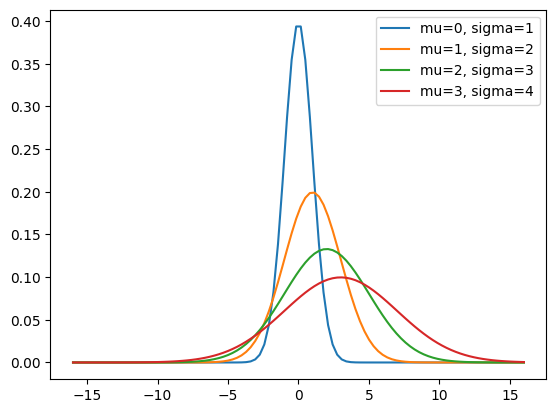

In [54]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

mu = [0, 1, 2, 3]
sigma = [1, 2, 3, 4]

x_min = -16
x_max = 16
x_nb = 100

x = np.linspace(x_min, x_max, x_nb)

for i in range(len(mu)):
    y = norm.pdf(x, mu[i], sigma[i])
    plt.plot(x, y, label='mu='+str(mu[i])+', sigma='+str(sigma[i]))
plt.legend(loc='upper right')
plt.show()

Commentez les courbes et observez l'impact des valeurs de $\sigma$.

**Réponse :** Nous remarquons que plus la valeur de sigma est élevée, plus la courbe est écrasée.

## Inférence des paramètres d'une loi normale

On insère une bannière publicitaire dans une page web. On trace les connexions à cette page auprès de $50$ utilisateurs et ce pendant $1000$ jours. Pour chaque visite on note si l'utilisateur a cliqué sur la bannière ou non. 

Les chiffres des clics (par jour) sont donnés dans le fichier <code>baniere.csv</code> disponible à l'adresse https://www.labri.fr/perso/zemmari/datasets/baniere.csv.

1. Charger les données dans une variable de nom <code>data</code> en utilisant la fonction <code>read_csv</code> de la bibliothèque <code>pandas</code> (elle accepte les urls).

In [55]:
import pandas as pd

data = pd.read_csv('baniere.csv')
data.head()

,14
0,17
1,8
2,20
3,19
4,9


2. Donner une estimation de la probabilité qu'un visiteur du site (choisi au hasard) clique sur la bannière. 

In [58]:
moyenne = data['14'].mean()
pourcentage = moyenne * 2
print("La probabilité qu'un utilisateur clique sur la bannière est de : ", pourcentage, '%')


La probabilité qu'un utilisateur clique sur la bannière est de :  30.346346346346348 %


3. Le code suivant permet de tracer l'histogramme des données comme une courbe. Qu'observez-vous pour la forme de la courbe ? 

In [59]:
from collections import Counter

compteur = Counter(list(data[0]))
#print(compteur)

x = list(compteur.keys())
print(x)
y = [compteur[x[i]] for i in range(len(x))  ]
print(y)
plt.scatter(x, y, c='red', marker='+')

KeyError: 0

4. Calculez l'estimateur $\hat\mu$ de la moyenne et $\hat\sigma$ de la variance. 

<em>Indication :</em> des estimateurs non biaisés de la moyenne et de la variance d'une série $(x_i)_{1\leq i\leq n}$ sont donnés par :
$$
\hat\mu = \frac 1 n \sum_{i=1}^n x_i, \,\,\,\, \hat\sigma^2 = \frac 1 {n} \sum_{i=1}^n \left(x_i - \hat\mu\right)^2.
$$
On peut néanmoins utiliser directement les fonctions <code>average</code> et <code>std</code> de la bibliothèque <code>numpy</code>.

In [60]:
mu_chapeau = np.average(x)
sigma_chapeau_carre = np.var(x, ddof=1)
print("Estimateur de la moyenne (mu_chapeau):", mu_chapeau)
print("Estimateur de la variance (sigma_chapeau^2):", sigma_chapeau_carre)

Estimateur de la moyenne (mu_chapeau): 1.3145040611561853e-15
Estimateur de la variance (sigma_chapeau^2): 87.9366051083223


5. Dessinez la courbe de la fonction de répartition de la loi normale de paramètres $\hat\mu$ et $\hat\sigma$ sur la même figure que celle de la question 4. Qu'observez vous ?

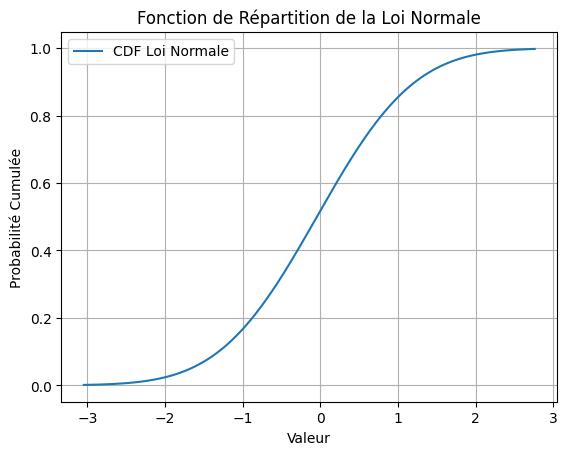

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simuler des données
np.random.seed(0)  # Pour la reproductibilité
x = np.random.normal(loc=0, scale=1, size=1000)  # Générer des données normales

# Calculer les estimateurs
mu_chapeau = np.average(x)
sigma_chapeau = np.std(x, ddof=1)

# Points pour le tracé de la CDF
x_values = np.linspace(np.min(x), np.max(x), 1000)
y_values = norm.cdf(x_values, loc=mu_chapeau, scale=sigma_chapeau)

# Tracé de la CDF de la loi normale
plt.plot(x_values, y_values, label='CDF Loi Normale')

plt.title('Fonction de Répartition de la Loi Normale')
plt.xlabel('Valeur')
plt.ylabel('Probabilité Cumulée')
plt.legend()
plt.grid(True)
plt.show()


# Exercice 3
Le nombre de véhicules passant sur une petite route de campagne en une journée est une variable aléatoire $X$ qui suit une loi de Poisson $\mathcal{P}(5)$.
On va simuler une année de circulation sur cette route. Pour cela, importons la bibliothèque numpy.random
à l’aide de l’instruction import numpy.random as rd, et utilisons la commande A = rd.poisson(5,[52,7]).
La i-eme ligne de $A$ correspond à la i-eme semaine de circulation. On obtient ainsi une matrice $A$ qui contient
$52\times 7$ nombres tirés suivant la loi $\mathcal{P}(5)$.

1 Déterminer le nombre maximal de véhicules circulant sur la route en une journée durant l’année. Et le
nombre maximal de véhicules un mercredi durant l’année ?

2 Déterminer les numéros des semaines où la route a connu son maximum de fréquentation.

3 Calculer le nombre moyen de véhicules par jour durant ces 364 jours. Recommencez plusieurs fois en
recréant la matrice A. Que constatez-vous ? Était-ce prévisible ?

4 En une seule ligne de commande, évaluer la probabilité qu’une journée voit passer plus de 8 véhicules. 
Sauriez-vous calculer la valeur exacte de cette probabilité ? 

5 Toujours en une seule ligne de commande, déterminer le nombre de jours où la route a connu son minimum
de fréquentation.

In [62]:
import numpy.random as rd

# Génération de la matrice A pour une année de circulation (52 semaines, 7 jours par semaine)
A = rd.poisson(5, [52, 7])

# 1. Nombre maximal de véhicules en une journée et un mercredi
max_vehicules_jour = A.max()
max_vehicules_mercredi = A[:, 2].max()  # Mercredi est le 3ème jour de la semaine, donc indice 2

# 2. Numéros des semaines du maximum de fréquentation
semaines_max_freq = (A == max_vehicules_jour).any(axis=1).nonzero()[0] + 1  # +1 pour avoir le numéro de semaine

# 3. Nombre moyen de véhicules par jour sur les 364 jours
moyenne_vehicules_jour = A.mean()

# 4. Probabilité qu'une journée voit passer plus de 8 véhicules
prob_plus_8_vehicules = (A > 8).mean()

# 5. Nombre de jours au minimum de fréquentation
jours_min_freq = (A == A.min()).sum()

# Affichage des résultats
print(f"Nombre maximal de véhicules en une journée: {max_vehicules_jour}")
print(f"Nombre maximal de véhicules un mercredi: {max_vehicules_mercredi}")
print(f"Numéros des semaines du maximum de fréquentation: {semaines_max_freq}")
print(f"Nombre moyen de véhicules par jour: {moyenne_vehicules_jour}")
print(f"Probabilité qu'une journée voit passer plus de 8 véhicules: {prob_plus_8_vehicules}")
print(f"Nombre de jours au minimum de fréquentation: {jours_min_freq}")


Nombre maximal de véhicules en une journée: 12
Nombre maximal de véhicules un mercredi: 10
Numéros des semaines du maximum de fréquentation: [32]
Nombre moyen de véhicules par jour: 5.186813186813187
Probabilité qu'une journée voit passer plus de 8 véhicules: 0.08241758241758242
Nombre de jours au minimum de fréquentation: 2


# Exercice 4:
On lance indéfiniment un dé équilibré à 6 faces numérotées de 1 à 6.
Écrire un programme permettant de simuler ces lancers de dé et qui renvoie le rang du lancer où l’on
obtient pour la première fois un numéro déjà obtenu

In [63]:
import numpy as np

def trouver_premier_doublon():
    numeros_obtenus = set()  # Ensemble pour stocker les numéros déjà obtenus
    rang = 0  # Initialisation du rang

    while True:
        rang += 1
        resultat_lancer = np.random.randint(1, 7)  # Simuler un lancer de dé (1 à 6)
        
        if resultat_lancer in numeros_obtenus:
            return rang  # Retourne le rang du premier doublon
        else:
            numeros_obtenus.add(resultat_lancer)

# Appel de la fonction pour trouver le rang du premier doublon
rang_premier_doublon = trouver_premier_doublon()
print(f"Le rang du lancer où l'on obtient pour la première fois un numéro déjà obtenu est : {rang_premier_doublon}")


Le rang du lancer où l'on obtient pour la première fois un numéro déjà obtenu est : 2


# Exercice 5
À un guichet, des clients peuvent venir expédier ou retirer un colis. Au cours d’une journée, le nombre
de clients $N$ qui s’y présentent suit la loi de Poisson de paramètre $\lambda$ (où $\lambda\in\mathbb{R}^*_+$). Chaque client a une probabilité $p$ où $p\in ]0, 1[$ de venir pour expédier un colis et $1- p$ pour en retirer un.
On note $C$ le nombre de colis expédiés dans la journée.

1 Pour tout $k \in\mathbb{N}$, déterminer l’espérance de $C$ conditionnellement à l’événement $[N = k]$.

2 En déduire l’espérance de $C$.

3 On suppose dans cette question que $p = 0.3$ et $\lambda = 2.5$.

(a) Écrire un programme renvoyant un vecteur $C$ contenant $n = 10000$ réalisations de la variable
aléatoire $C$.

(b) Comparer alors l’espérance empirique obtenue avec l’espérance théorique.

(c) On souhaite représenter le diagramme en bâtons des fréquences de l’échantillon.

i. Exécuter la commande np.mean(C<=4). Que dire des valeurs prises par $C$ ?

ii. Représenter le diagramme en bâtons des fréquences de l’échantillon

Espérance empirique: 0.7456
Espérance théorique: 0.75
Probabilité que C soit inférieur ou égal à 4: 0.9984


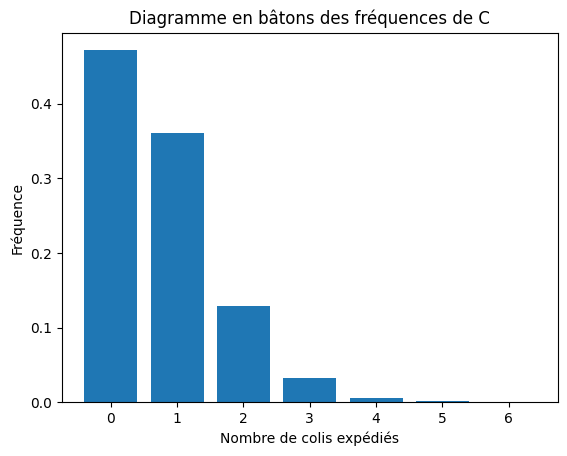

In [64]:
import numpy as np

# Paramètres donnés
p = 0.3
lambda_ = 2.5
n = 10000

# (a) Programme pour générer n réalisations de C
N = np.random.poisson(lambda_, n)  # Nombre de clients
C = np.random.binomial(N, p)  # Nombre de colis expédiés pour chaque réalisation de N

# (b) Comparaison de l'espérance empirique avec l'espérance théorique
esperance_empirique = np.mean(C)
esperance_theorique = lambda_ * p

print(f"Espérance empirique: {esperance_empirique}")
print(f"Espérance théorique: {esperance_theorique}")

# (c) Diagramme en bâtons des fréquences
# i. Exécution de np.mean(C<=4)
prob_C_le_4 = np.mean(C <= 4)
print(f"Probabilité que C soit inférieur ou égal à 4: {prob_C_le_4}")

# ii. Diagramme en bâtons des fréquences
from matplotlib import pyplot as plt

values, counts = np.unique(C, return_counts=True)
plt.bar(values, counts/n, tick_label=values)
plt.xlabel('Nombre de colis expédiés')
plt.ylabel('Fréquence')
plt.title('Diagramme en bâtons des fréquences de C')
plt.show()


# Exercice 6

1 Simuler avec la fonction Exponentielle $N = 10000$ valeurs de la loi $\mathcal{E}(0.5)$.


2 Tracer la courbe représentative de la densité $f$ de la loi $\mathcal{E}(0.5)$.

3 Tracer l’histogramme des fréquences de l’échantillon obtenu (on prendra pour cela une
subdivision $c$ de l’intervalle $[0, 10]$ en $p = 100$ intervalles de même longueur).

Comparer l’histogramme des fréquences de l’échantillon à la courbe représentative de $f$.
Qu’en pensez vous ?

4 Procéder de même pour la loi $\Gamma(3)$.


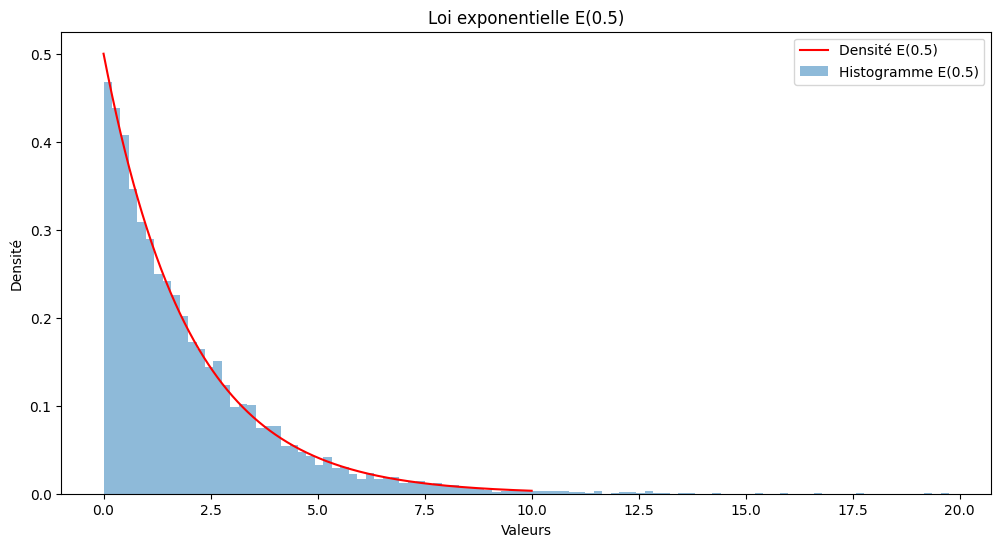

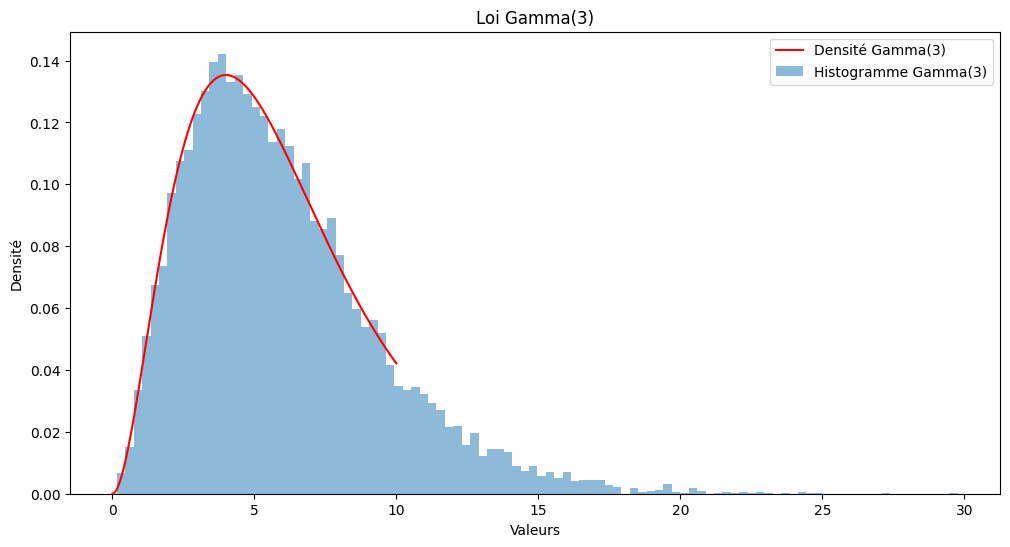

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma

# Paramètres
N = 10000
lambda_ = 0.5  # Pour la loi exponentielle E(0.5)
alpha_gamma = 3  # Paramètre de forme pour la loi Gamma(3)
scale_gamma = 1/lambda_  # Paramètre d'échelle pour la loi Gamma
p = 100  # Nombre d'intervalles pour l'histogramme

# 1. Générer un échantillon de la loi exponentielle E(0.5)
samples_exp = np.random.exponential(scale=1/lambda_, size=N)

# 2. Tracer la densité de la loi exponentielle E(0.5)
x_exp = np.linspace(0, 10, 1000)
y_exp = expon.pdf(x_exp, scale=1/lambda_)

plt.figure(figsize=(12, 6))
plt.plot(x_exp, y_exp, 'r-', label='Densité E(0.5)')
plt.hist(samples_exp, bins=p, density=True, alpha=0.5, label='Histogramme E(0.5)')
plt.title('Loi exponentielle E(0.5)')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()

# 3. Générer un échantillon de la loi Gamma(3)
samples_gamma = np.random.gamma(shape=alpha_gamma, scale=scale_gamma, size=N)

# 4. Tracer la densité de la loi Gamma(3)
x_gamma = np.linspace(0, 10, 1000)
y_gamma = gamma.pdf(x_gamma, a=alpha_gamma, scale=scale_gamma)

plt.figure(figsize=(12, 6))
plt.plot(x_gamma, y_gamma, 'r-', label='Densité Gamma(3)')
plt.hist(samples_gamma, bins=p, density=True, alpha=0.5, label='Histogramme Gamma(3)')
plt.title('Loi Gamma(3)')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()